<a href="https://colab.research.google.com/github/BotchaSravani/Job-Market-Insights-Trends-Skills-and-Salaries/blob/main/Skills_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.6 MB/s eta 0:00:00


In [2]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from datasets import load_dataset

In [3]:
#Loading the dataset and cleaning the data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

In [31]:
#Filtering the data for Data Analysts

df_DA = df[(df['job_title'] == 'Data Analyst')].copy()

In [95]:
#Creating a new column with the month number
df_DA['job_posted_month_no'] = df['job_posted_date'].dt.month

In [96]:
#Exploding the data based on the skills
df_DA_exploded = df_DA.explode('job_skills')

In [97]:
#creating a pivot table
df_DA_pivot = df_DA_exploded.pivot_table(index = 'job_posted_month_no', columns = 'job_skills', aggfunc = 'size', fill_value=0)

df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot_table = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index].copy()

df_DA_pivot_table.drop('Total', inplace = True)


In [98]:
#creating a seperate dataframe with totals of job postings in each month
DA_Totals = df_DA.groupby('job_posted_month_no').size()

In [99]:
#using pandas we can divide a data frame with a number, series, list etc. using div function. Axis takes either 0 or 1. 0 if we are using the index to compare. Here the index is month number

df_DA_perc = df_DA_pivot_table.div(DA_Totals/100, axis=0)


In [100]:
df_DA_perc = df_DA_perc.reset_index()
df_DA_perc['job_posted_month'] = df_DA_perc['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_perc = df_DA_perc.set_index('job_posted_month')
df_DA_perc.drop(columns = 'job_posted_month_no', inplace=True)
df_DA_perc

job_skills,sql,excel,python,tableau,power bi,r,sas,azure,powerpoint,word,aws,oracle,sql server,sap,go,looker,spss,snowflake,flow,vba,qlik,javascript,spark,java,jira,dax,bigquery,hadoop,mysql,alteryx,sharepoint,pandas,gcp,sheets,ssis,databricks,outlook,git,ssrs,mongodb,redshift,postgresql,nosql,c,spreadsheet,airflow,matlab,cognos,numpy,confluence,...,rust,drupal,delphi,clickup,digitalocean,nltk,ruby on rails,laravel,firestore,puppet,redhat,openstack,fastapi,tidyr,fortran,apl,electron,elixir,ubuntu,codecommit,lua,objective-c,wrike,workfront,symfony,kali,couchbase,theano,sqlserver,unreal,colocation,ionic,hugging face,google chat,mlr,ringcentral,opencv,react.js,heroku,clojure,chainer,debian,pascal,mxnet,next.js,nuix,suse,svelte,twilio,wsl
job_posted_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jan,58.577742,36.560868,32.965046,29.610285,22.378465,17.095219,18.320611,6.126959,6.528726,5.825633,5.423865,5.664926,5.222981,3.314584,4.459622,4.077943,4.057855,3.073524,3.455203,3.455203,3.394938,3.354761,2.149458,2.350342,3.033347,2.792286,2.470872,2.430695,2.069104,2.571314,1.868220,1.406187,1.787867,1.928485,1.727601,1.767778,1.627160,1.446364,1.486541,1.687425,1.566894,1.145038,1.466452,1.366010,1.707513,1.024508,1.285657,1.205303,0.763359,1.124950,...,0.060265,0.100442,0.000000,0.020088,0.000000,0.020088,0.000000,0.000000,0.000000,0.000000,0.000000,0.020088,0.000000,0.000000,0.000000,0.020088,0.020088,0.020088,0.020088,0.000000,0.000000,0.000000,0.020088,0.000000,0.000000,0.000000,0.040177,0.000000,0.000000,0.020088,0.040177,0.000000,0.000000,0.000000,0.000000,0.020088,0.000000,0.000000,0.000000,0.000000,0.000000,0.020088,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,57.829912,36.158358,33.431085,28.299120,23.607038,17.272727,17.008798,7.478006,6.715543,6.217009,5.835777,5.337243,5.542522,3.548387,4.134897,4.809384,3.108504,3.753666,4.105572,3.431085,3.812317,3.255132,2.316716,2.082111,2.170088,2.316716,2.287390,2.052786,2.228739,2.639296,2.316716,1.554252,1.788856,1.583578,1.994135,1.348974,1.730205,1.290323,2.346041,1.994135,1.583578,1.026393,1.642229,1.143695,1.173021,1.554252,1.085044,1.055718,1.055718,0.733138,...,0.029326,0.000000,0.000000,0.000000,0.000000,0.029326,0.000000,0.029326,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029326,0.000000,0.058651,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029326,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029326
Mar,57.940042,36.895221,33.095874,30.335411,23.983378,17.393885,16.503413,6.055209,6.559810,6.589492,4.956961,6.173939,4.838231,3.888394,4.363313,3.858712,3.918077,3.502523,3.710300,3.235381,3.799347,3.354111,2.968240,2.404274,2.107450,2.255862,2.137133,2.582369,2.493321,2.315227,2.493321,1.721579,2.077768,1.187296,2.077768,1.216978,1.810626,1.543485,1.573167,1.662214,1.157614,1.276343,1.216978,1.306026,1.276343,1.276343,0.949837,1.424755,0.920154,0.860790,...,0.000000,0.029682,0.000000,0.089047,0.000000,0.059365,0.000000,0.059365,0.000000,0.000000,0.000000,0.000000,0.029682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059365,0.029682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029682,0.000000,0.000000,0.029682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029682,0.000000,0.000000,0.000000
Apr,59.361572,37.507673,34.653161,29.465930,23.112339,17.771639,15.715163,5.985267,6.599141,7.213014,6.629834,6.660528,5.678330,4.419890,4.511971,4.665439,3.314917,4.511971,3.867403,3.683241,3.314917,2.946593,2.455494,3.222836,2.516882,1.565378,1.657459,2.793125,2.670350,2.854512,1.964395,1.596071,2.332719,1.780233,1.626765,1.596071,1.841621,1.596071,2.179251,1.227747,1.933702,1.657459,1.3

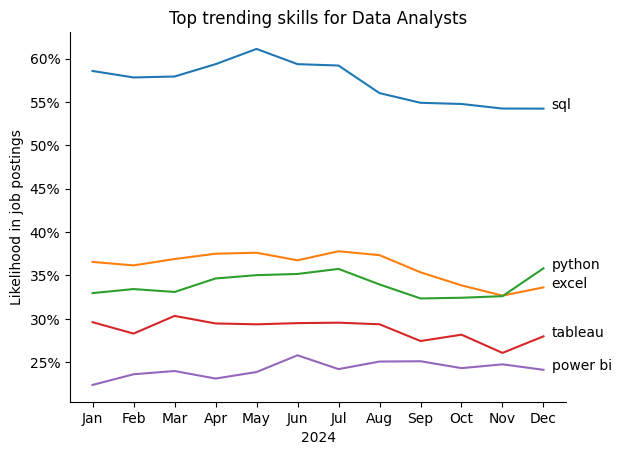

In [120]:
df_plot = df_DA_perc.iloc[:, :5]

sns.lineplot(data = df_plot, dashes = False, palette='tab10')
plt.title('Top trending skills for Data Analysts')
plt.xlabel('2024')
plt.ylabel('Likelihood in job postings')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals = 0))
for i in range(5):
  plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])

sns.despine()